In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("test.csv")

In [3]:
df1.head()

,timestamp,building_number
0,2018-01-01 00:00:00,1
1,2018-01-01 00:15:00,1
2,2018-01-01 00:30:00,1
3,2018-01-01 00:45:00,1
4,2018-01-01 01:00:00,1


In [4]:
import time

In [5]:
df1["timestamp"][0]

'2018-01-01 00:00:00'

In [6]:
len(df1)

51617

In [7]:
x=[time.strptime(df1["timestamp"][i],"%Y-%m-%d %H:%M:%S") for i in range(len(df1))]

In [8]:
x[0]

time.struct_time(tm_year=2018, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=1, tm_isdst=-1)

In [9]:
data = {"month":[x[i].tm_mon for i in range(len(x))], "date": [x[i].tm_mday for i in range(len(x))], "hour":[x[i].tm_hour for i in range(len(x))],"min": [x[i].tm_min for i in range(len(x))],"sec": [x[i].tm_sec for i in range(len(x))]}

In [10]:
df = pd.DataFrame(data) 


In [11]:
result = pd.concat([df, df1], axis=1, sort=False)

In [12]:
result=result.drop([ 'sec'], axis= 1)

In [13]:
def combine(hour, m):
    if m==0:
        x=0
    elif m==15:
        x=0.25
    elif m==30:
        x=0.5
    elif m==45:
        x=0.75
    return hour+x

In [14]:
type(result["hour"][0])

numpy.int64

In [15]:
temp = [combine(result["hour"][i], result["min"][i]) for i in range(len(result))]

In [16]:
result['time']=temp

In [17]:
result=result.drop([ 'hour', 'min'], axis= 1)

In [18]:
result

,month,date,timestamp,building_number,time
0,1,1,2018-01-01 00:00:00,1,0.00
1,1,1,2018-01-01 00:15:00,1,0.25
2,1,1,2018-01-01 00:30:00,1,0.50
3,1,1,2018-01-01 00:45:00,1,0.75
4,1,1,2018-01-01 01:00:00,1,1.00
...,...,...,...,...,...
51612,4,18,2018-04-18 12:00:00,5,12.00
51613,4,18,2018-04-18 12:15:00,5,12.25
51614,4,18,2018-04-18 12:30:00,5,12.50
51615,4,18,2018-04-18 12:45:00,5,12.75


In [19]:
df1=result[result['building_number']==1]
df2=result[result['building_number']==2]
df3=result[result['building_number']==3]
df4=result[result['building_number']==4]
df5=result[result['building_number']==5]

In [20]:
df1.to_csv('Building1.csv', index=None)
df2.to_csv('Building2.csv', index = None)
df3.to_csv('Building3.csv', index = None)
df4.to_csv('Building4.csv', index = None)
df5.to_csv('Building5.csv', index = None)


In [21]:
df1_4=df1[df1['month']==4]
df1_5=df1[df1['month']==5]
df1_6=df1[df1['month']==6]


In [22]:
plt.figure(figsize=(10, 6))
fig=plt.figure()
plt.scatter(df1_4['time'],df1_4['main_meter'] )
plt.xlabel('Time')
plt.ylabel('Main_meter')
plt.title('Building_1_main-meter')
plt.show()

KeyError: 'main_meter'

<Figure size 720x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

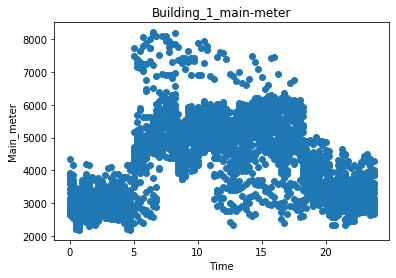

In [61]:
fig=plt.figure()
plt.scatter(df1_5['time'],df1_5['main_meter'] )
plt.xlabel('Time')
plt.ylabel('Main_meter')
plt.title('Building_1_main-meter')
plt.show()

In [53]:
plt.figure(figsize=(10, 6))



<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

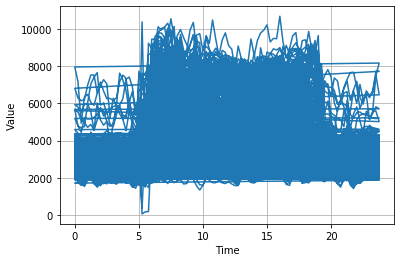

In [54]:
plot_series(df1['time'], df1['main_meter'])